# Decision Trees

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Data loading

We are going to use the churn data-set and do a binary classification task on it.

In [88]:
df = pd.read_csv("Telco Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


We need to find the data points that doesn't have `TotalCharges` value and remove them.

In [90]:
# CODE
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df = df.dropna(subset=['TotalCharges'])


In [91]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [92]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26468\1710382706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] = df["TotalCharges"].astype(float)


We will use the following features:

In [93]:
X = df[["tenure", "MonthlyCharges", "TotalCharges"]]
y = df["Churn"]

Encoding the categorical features with __Label Encoding__:

In [94]:
# CODE
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ["gender", "Partner", "Dependents", "PhoneService", 
                       "MultipleLines", "InternetService", "OnlineSecurity", 
                       "OnlineBackup", "DeviceProtection", "TechSupport", 
                       "StreamingTV", "StreamingMovies", "Contract", 
                       "PaperlessBilling", "PaymentMethod"]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26468\2339118780.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26468\2339118780.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26468\2339118780.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Split the data to train and test

In [95]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build Decision tree model

In [96]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# train model
decision_tree_model.fit(X_train, y_train)


# predictions on the test set
y_pred = decision_tree_model.predict(X_test)



Fit data

In [97]:
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Test accuracy

In [98]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7192608386638237


depth of the decision tree

In [99]:
tree_depth = decision_tree_model.get_depth()
print("Depth of the Decision Tree:", tree_depth)

Depth of the Decision Tree: 26


### Tuning the depth of the tree:

The `max_depth` identifies the maximum depth of the tree. By default, it is set to None which means that the nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples (which is by default set to 2). Therefore with these default paramters our decision tree will have a very large depth and it will __over-fit__ on the training data.

#### Exercise:
Tune the `max_depth` parameter and find the best value for it. What is the precision and recall for the best decision-tree classifier?

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

# Define the parameter grid for max_depth
param_grid = {'max_depth': [None, 3, 5, 7, 10, 15]}

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameter
best_max_depth = grid_search.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

# Initialize Decision Tree model with the best max_depth
best_decision_tree_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Train the model with the best max_depth
best_decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_decision_tree_model.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')

print("Precision:", precision)
print("Recall:", recall)



Best max_depth: 5
Precision: 0.6378600823045267
Recall: 0.4144385026737968


With the best max_depth parameter determined to be 5, the precision and recall of the best decision tree classifier are as follows:

Precision: 0.6378600823045267
Recall: 0.4144385026737968
These values indicate the performance of the classifier in predicting the positive class ('Yes', which represents churn in this case). A precision of approximately 0.64 means that when the classifier predicts a customer will churn, it is correct about 64% of the time. A recall of approximately 0.41 means that the classifier correctly identifies about 41% of the actual churn cases.

Plot the score v.s depth of tree

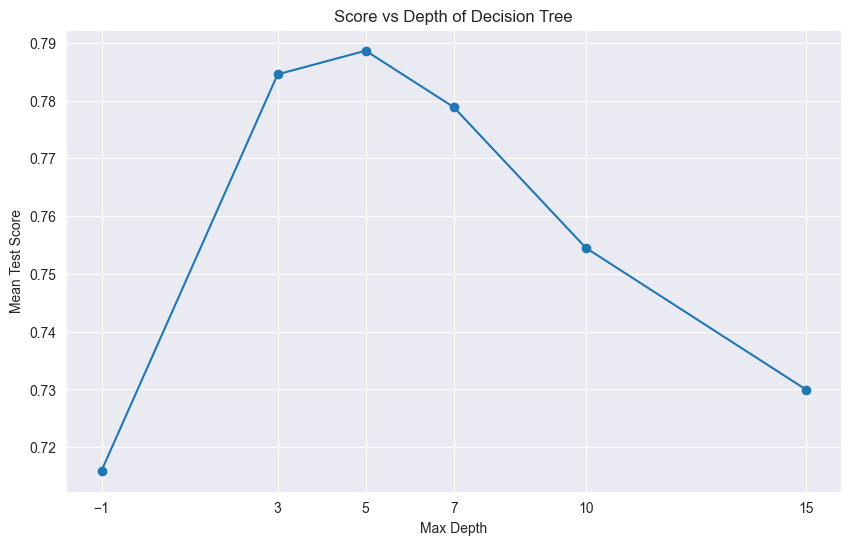

In [101]:
import matplotlib.pyplot as plt

# Get the mean test scores and corresponding depth values
mean_test_scores = grid_search.cv_results_['mean_test_score']
depth_values = [param['max_depth'] if param['max_depth'] is not None else -1
                for param in grid_search.cv_results_['params']]

# Plot score vs depth
plt.figure(figsize=(10, 6))
plt.plot(depth_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Score vs Depth of Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.xticks(depth_values)
plt.show()

best depth

In [102]:
best_index = np.argmax(mean_test_scores)

best_depth = depth_values[best_index]
print("Best depth:", best_depth)

Best depth: 5


### Feature importance
The importance of a feature is computed as the (normalized) total reduction of the criterion (which is entropy in this case) brought by that feature.

In [103]:
importances = best_decision_tree_model.feature_importances_
feature_names = ["tenure", "MonthlyCharges", "TotalCharges"]  

# Create a dictionary mapping feature names to their importances
feature_importances = dict(zip(feature_names, importances))

# Find the most important feature
most_important_feature = max(feature_importances, key=feature_importances.get)
print("Most important feature:", most_important_feature)


Most important feature: tenure


What is the most important feature in this classification task? Does it make sense?

### Visualizing the decision tree

Let's visualize the decision tree with the optimum `max_depth` parameter.

In [104]:
import six

In [105]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(export_graphviz(clf, out_file=None
   , feature_names=X_train.columns, class_names=['No', 'Yes']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

ModuleNotFoundError: No module named 'sklearn.externals.six'

## Exercise: decision tree regressor

In this exercise we will use decision trees for a regression problem. We will use the Boston Housing dataset. This data-set contains information about houses in the suburbs of Boston. There are 506 samples and 14 attributes. For simplicity and visualization purposes, we will only use two — MEDV (median value of owner-occupied homes in $1000s) as the target and LSTAT (percentage of lower status of the population) as the feature.

In [ ]:
from sklearn import datasets

boston = ...           # Load Boston Dataset
df = ....      # Create DataFrame using only the LSAT feature
df.columns = ['LSTAT']
df['MEDV'] = ...                 # Create new column with the target MEDV
df.head()

### train-test split

In [ ]:
# TO DO

### Decision tree regressor
Now it is time to find a model which fits this data. Note that as we have a regression problem here, we need a criterion which is suitable for a continuous output. Tune the maximum depth of the tree and find the best value. What is the test error for this regressor?

In [ ]:
# TO DO: training the decision tree regressor

# an example of decision tree regressor with depth=3


In [ ]:
# TO DO: tune the max_depth parameter

In [ ]:
# TO DO: test error for the best decision tree regressor


Plot the data points together with the regression tree line fit to see how good the model fits the data.

In [ ]:
# TO DO
plt.figure(figsize=(16, 8))
plt.scatter(.., .., c='steelblue', edgecolor='white', s=70)   # Plot actual target against features
plt.plot(.., .., color='black', lw=2)               # Plot predicted target against features
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()